In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_style("whitegrid")

In [3]:
data = {}
stats = {}
data['a2c'] = pd.read_csv('results_safe_rl_report/a2c_0_50/summary.csv')
data['dqn'] = pd.read_csv('results_safe_rl_report/dqn_0_50/summary.csv')
data['ppo'] = pd.read_csv('results_safe_rl_report/ppo_0_50/summary.csv')
data['trpo'] = pd.read_csv('results_safe_rl_report/trpo_0_50/summary.csv')

full_data = pd.concat([df.assign(identity=k) for k,df in data.items()])
full_data.rename(columns={'identity': 'algorithm'}, inplace=True)

/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


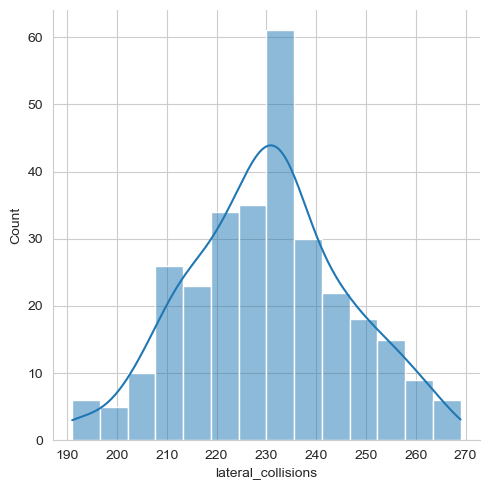

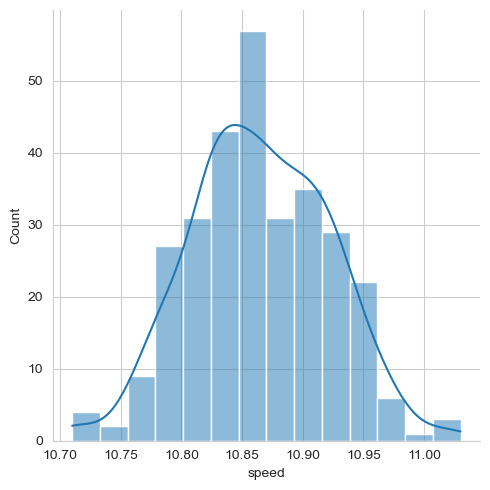

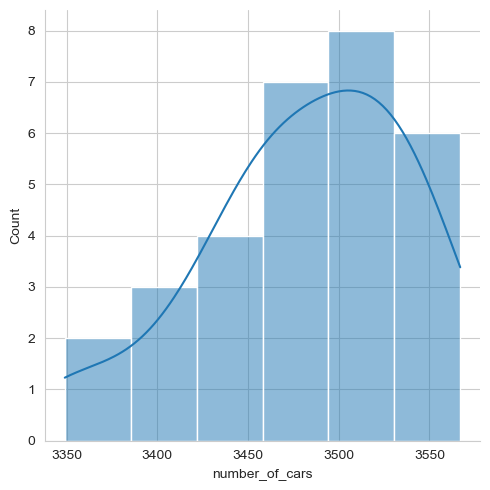

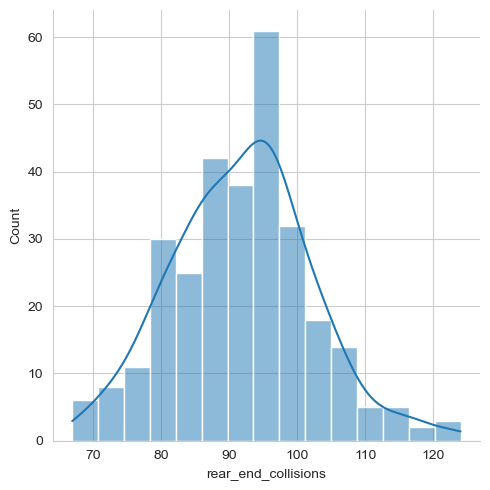

In [4]:
sns.displot(data['a2c'], x='lateral_collisions', kde=True)
sns.displot(data['a2c'], x='speed', kde=True)
sns.displot(data['a2c'], x='number_of_cars', kde=True)
sns.displot(data['a2c'], x='rear_end_collisions', kde=True)

In [5]:
stats['a2c']=pd.DataFrame()
stats['a2c']["mean"]=data['a2c'].mean()
stats['a2c']["Std.Dev"]=data['a2c'].std()
stats['a2c']["Var"]=data['a2c'].var()

stats['a2c'].T

,index,routeLength,speed,duration,waitingTime,timeLoss,departDelay,departDelayWaiting,totalTravelTime,totalDepartDelay,rear_end_collisions,lateral_collisions,emergency_brakes,number_of_cars
mean,149.500000,389.942867,10.864800,37.498467,1.014567,9.630733,0.0,-1.0,1.305572e+05,0.620000,91.946667,230.283333,12.043333,3481.933333
Std.Dev,86.746758,0.240990,0.057118,0.205600,0.069114,0.193968,0.0,0.0,2.402067e+03,1.403150,10.230315,15.857319,36.361270,57.521770
Var,7525.000000,0.058076,0.003263,0.042271,0.004777,0.037624,0.0,0.0,5.769927e+06,1.968829,104.659353,251.454571,1322.141929,3308.754023


In [6]:
stats['dqn'] = pd.DataFrame()
stats['dqn']["mean"] = data['dqn'].mean()
stats['dqn']["Std.Dev"] = data['dqn'].std()
stats['dqn']["Var"] = data['dqn'].var()

stats['dqn'].T

,index,routeLength,speed,duration,waitingTime,timeLoss,departDelay,departDelayWaiting,totalTravelTime,totalDepartDelay,rear_end_collisions,lateral_collisions,emergency_brakes,number_of_cars
mean,149.500000,390.037033,8.849133,53.078833,6.374000,25.232400,0.013233,-1.0,1.846509e+05,48.860000,104.410000,234.726667,8.293333,3484.000000
Std.Dev,86.746758,0.242831,0.147804,1.450627,0.378359,1.458861,0.027491,0.0,6.775705e+03,94.644982,10.808855,16.195667,25.058206,56.530736
Var,7525.000000,0.058967,0.021846,2.104320,0.143156,2.128274,0.000756,0.0,4.591018e+07,8957.672642,116.831338,262.299621,627.913668,3195.724138


In [7]:
scipy.stats.ttest_ind(data['a2c']['lateral_collisions'], data['dqn']['rear_end_collisions'])

Ttest_indResult(statistic=113.60614141992448, pvalue=0.0)

In [8]:
scipy.stats.ttest_ind(data['a2c']['lateral_collisions'], data['dqn']['lateral_collisions'])

Ttest_indResult(statistic=-3.395406947013558, pvalue=0.000730680564104436)

In [9]:
scipy.stats.ttest_ind(data['a2c']['rear_end_collisions'], data['dqn']['rear_end_collisions'])

Ttest_indResult(statistic=-14.504978806517308, pvalue=4.549415862311835e-41)

<Axes: xlabel='algorithm', ylabel='rear_end_collisions'>

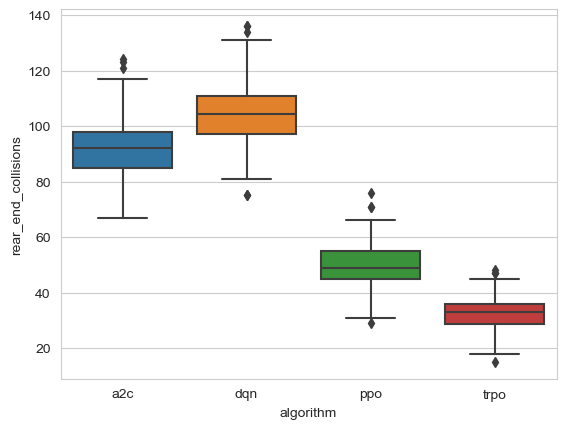

In [10]:
sns.boxplot(x='algorithm', y='rear_end_collisions', data=full_data)

<Axes: xlabel='algorithm', ylabel='timeLoss'>

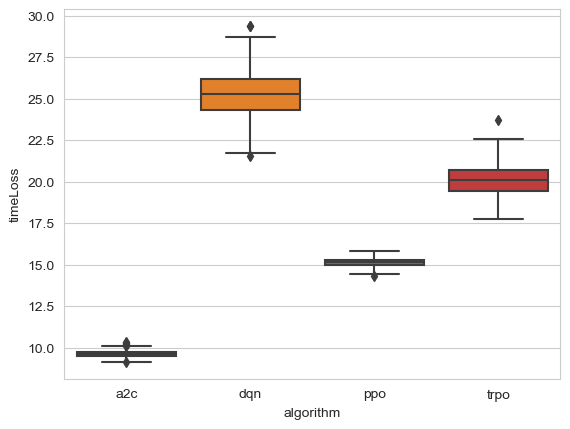

In [11]:
sns.boxplot(x='algorithm', y='timeLoss', data=full_data)

<Axes: xlabel='speed_limit', ylabel='timeLoss'>

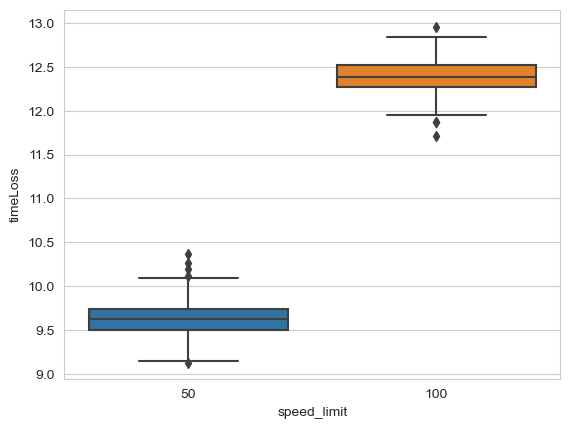

In [12]:
data_100 = {}
stats_100 = {}
data_100['a2c'] = pd.read_csv('results_safe_rl_report/a2c_0_100/summary.csv')
data_100['dqn'] = pd.read_csv('results_safe_rl_report/dqn_0_100/summary.csv')
data_100['ppo'] = pd.read_csv('results_safe_rl_report/ppo_0_100/summary.csv')
data_100['trpo'] = pd.read_csv('results_safe_rl_report/trpo_0_100/summary.csv')

full_data_100 = pd.concat([df.assign(identity=k) for k,df in data_100.items()])
data_dict = {'50': full_data, '100': full_data_100}
data_dict = {'50': data['a2c'], '100': data_100['a2c']}
complete = pd.concat([df.assign(identity=k) for k,df in data_dict.items()])
complete.rename(columns={'identity': 'speed_limit'}, inplace=True)

sns.boxplot(x='speed_limit', y='timeLoss', data=complete)


In [13]:
a2c_data = {'30': pd.read_csv('results_safe_rl_report/a2c_0_30/summary.csv'),
            '50': pd.read_csv('results_safe_rl_report/a2c_0_50/summary.csv'),
            '80': pd.read_csv('results_safe_rl_report/a2c_0_80/summary.csv'),
            '100': pd.read_csv('results_safe_rl_report/a2c_0_100/summary.csv'),
            '130': pd.read_csv('results_safe_rl_report/a2c_0_130/summary.csv')}

a2c_data_full = pd.concat([df.assign(identity=k) for k,df in a2c_data.items()])
a2c_data_full.rename(columns={'identity': 'speed_limit'}, inplace=True)

trpo_data = {'30': pd.read_csv('results_safe_rl_report/trpo_0_30/summary.csv'),
            '50': pd.read_csv('results_safe_rl_report/trpo_0_50/summary.csv'),
            '80': pd.read_csv('results_safe_rl_report/trpo_0_80/summary.csv'),
            '100': pd.read_csv('results_safe_rl_report/trpo_0_100/summary.csv'),
            '130': pd.read_csv('results_safe_rl_report/trpo_0_130/summary.csv')}

trpo_data_full = pd.concat([df.assign(identity=k) for k,df in trpo_data.items()])
trpo_data_full.rename(columns={'identity': 'speed_limit'}, inplace=True)

a2c_trpo_speed_dict = {'a2c': a2c_data_full, 'trpo': trpo_data_full}
a2c_trpo_speed_data = pd.concat([df.assign(identity=k) for k,df in a2c_trpo_speed_dict.items()])
a2c_trpo_speed_data.rename(columns={'identity': 'algorithm'}, inplace=True)

<Axes: xlabel='speed_limit', ylabel='rear_end_collisions'>

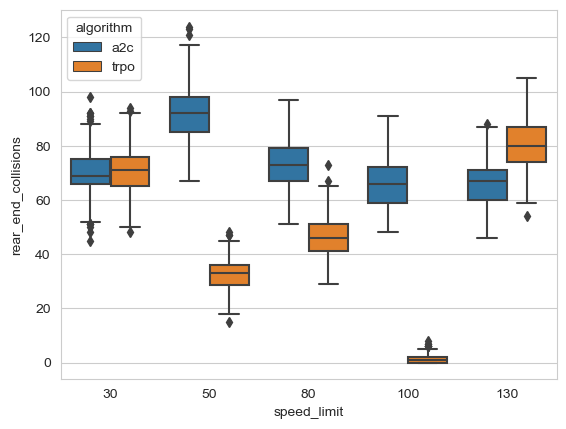

In [14]:
value_of_interest = 'rear_end_collisions'
melt = pd.melt(a2c_trpo_speed_data[['algorithm', 'speed_limit', value_of_interest]], id_vars=['algorithm', 'speed_limit'])
melt.rename(columns={'value': value_of_interest}, inplace=True)
sns.boxplot(x='speed_limit', y=value_of_interest, hue='algorithm', data=melt)

In [15]:
a2c_data_shield = {'0': pd.read_csv('results_safe_rl_report/a2c_0_50/summary.csv'),
            '1': pd.read_csv('results_safe_rl_report/a2c_1_50/summary.csv'),
            '5': pd.read_csv('results_safe_rl_report/a2c_5_50/summary.csv'),
            '10': pd.read_csv('results_safe_rl_report/a2c_10_50/summary.csv'),
            '20': pd.read_csv('results_safe_rl_report/a2c_20_50/summary.csv'),
            '50': pd.read_csv('results_safe_rl_report/a2c_50_50/summary.csv'),
            '100': pd.read_csv('results_safe_rl_report/a2c_100_50/summary.csv')}

a2c_data_shield = pd.concat([df.assign(identity=k) for k,df in a2c_data_shield.items()])
a2c_data_shield.rename(columns={'identity': 'shield_distance'}, inplace=True)


<Axes: xlabel='shield_distance', ylabel='lateral_collisions'>

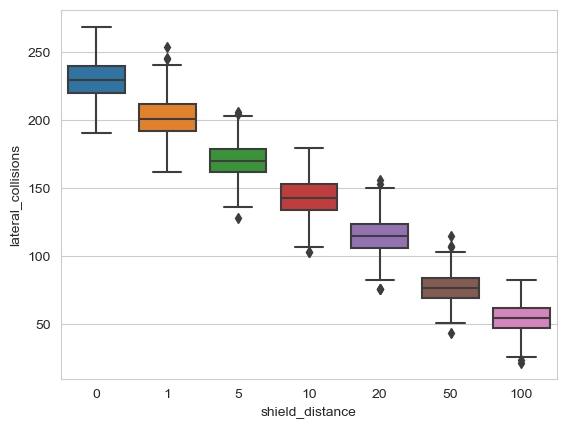

In [16]:
sns.boxplot(x='shield_distance', y='lateral_collisions', data=a2c_data_shield)

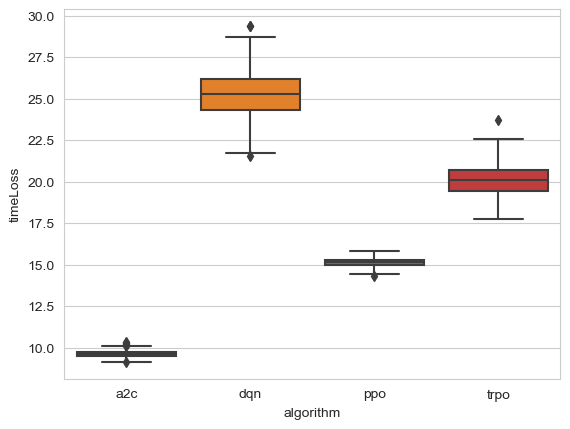

In [17]:
full_data['collisions'] = full_data['lateral_collisions'] + full_data['rear_end_collisions']
sns.boxplot(x='algorithm', y='timeLoss', data=full_data)
plt.savefig('graphs/safe_rl_report/timeloss_per_algorithm.png')

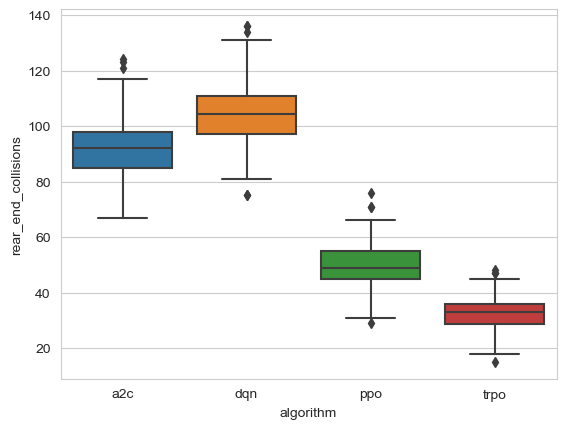

In [18]:
sns.boxplot(x='algorithm', y='rear_end_collisions', data=full_data)
plt.savefig('graphs/safe_rl_report/rear_end_collisions_per_algorithm.png')

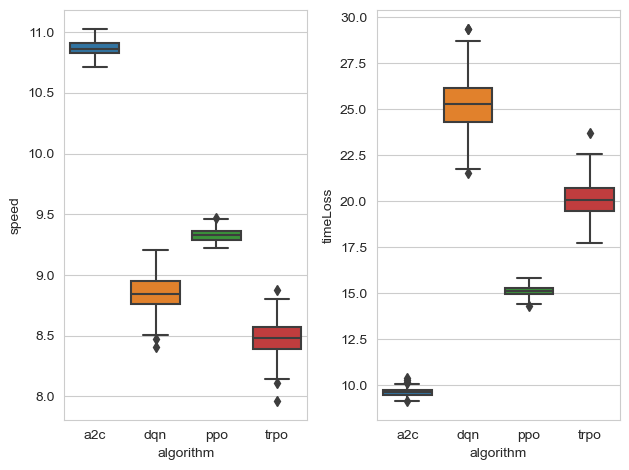

In [19]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x='algorithm', y='speed', data=full_data, ax=ax[0])
sns.boxplot(x='algorithm', y='timeLoss', data=full_data, ax=ax[1])
fig.tight_layout()
plt.savefig('graphs/safe_rl_report/performance_per_algorithm.png')

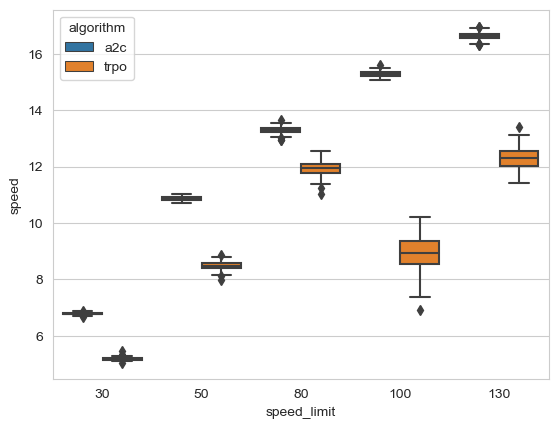

In [20]:
value_of_interest = 'speed'
melt = pd.melt(a2c_trpo_speed_data[['algorithm', 'speed_limit', value_of_interest]], id_vars=['algorithm', 'speed_limit'])
melt.rename(columns={'value': value_of_interest}, inplace=True)
sns.boxplot(x='speed_limit', y=value_of_interest, hue='algorithm', data=melt)
plt.savefig('graphs/safe_rl_report/speed_over_speed_limit.png')

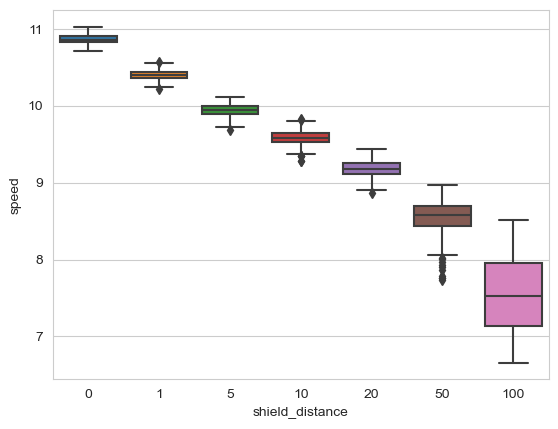

In [21]:
sns.boxplot(x='shield_distance', y='speed', data=a2c_data_shield)
plt.savefig('graphs/safe_rl_report/speed_over_shield.png')

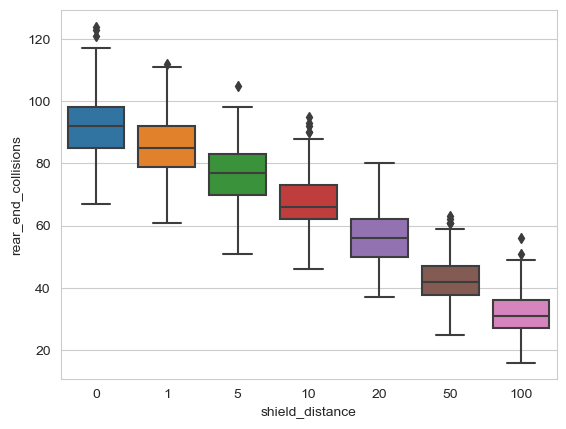

In [22]:
sns.boxplot(x='shield_distance', y='rear_end_collisions', data=a2c_data_shield)
plt.savefig('graphs/safe_rl_report/rear_end_over_shield.png')